# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [3]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_exc import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read MNIST data:
You can download the data from [here](https://yann.lecun.com/exdb/mnist/). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


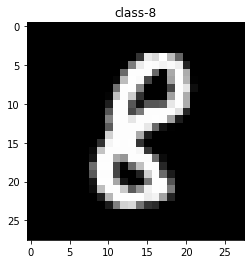

In [4]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '../Assignment_1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# TODO: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [5]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [6]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# prob_scores= net.forword(X_train[:100,:])
# print(prob_scores.shape)
# loss= net.loss(Y_train[:100],prob_scores)
# print(loss)
# back = net.backword(X_train[:100,:],Y_train[:100],prob_scores)
# print(back)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.516779: 100%|██████████| 300/300 [00:01<00:00, 214.01it/s]


epoch: 1 / (30), loss: 1.834659, train acc: 72.87, val acc: 73.20
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.026433: 100%|██████████| 300/300 [00:01<00:00, 200.78it/s]


epoch: 2 / (30), loss: 1.233280, train acc: 85.02, val acc: 84.85
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.836372: 100%|██████████| 300/300 [00:01<00:00, 217.15it/s]


epoch: 3 / (30), loss: 0.928961, train acc: 86.80, val acc: 86.38
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.757281: 100%|██████████| 300/300 [00:01<00:00, 215.47it/s]


epoch: 4 / (30), loss: 0.746358, train acc: 88.69, val acc: 88.60
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.621999: 100%|██████████| 300/300 [00:01<00:00, 192.67it/s]


epoch: 5 / (30), loss: 0.628356, train acc: 90.77, val acc: 90.57
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.514817: 100%|██████████| 300/300 [00:01<00:00, 238.62it/s]


epoch: 6 / (30), loss: 0.545442, train acc: 90.45, val acc: 90.05
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.504265: 100%|██████████| 300/300 [00:01<00:00, 233.58it/s]


epoch: 7 / (30), loss: 0.484715, train acc: 91.48, val acc: 91.23
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.369270: 100%|██████████| 300/300 [00:01<00:00, 211.75it/s]


epoch: 8 / (30), loss: 0.439071, train acc: 91.88, val acc: 91.62
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.379742: 100%|██████████| 300/300 [00:01<00:00, 184.66it/s]


epoch: 9 / (30), loss: 0.401509, train acc: 92.19, val acc: 91.93
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.360369: 100%|██████████| 300/300 [00:01<00:00, 214.06it/s]


epoch: 10 / (30), loss: 0.374018, train acc: 92.62, val acc: 92.15
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.311889: 100%|██████████| 300/300 [00:01<00:00, 195.63it/s]


epoch: 11 / (30), loss: 0.349461, train acc: 92.95, val acc: 92.78
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.359281: 100%|██████████| 300/300 [00:01<00:00, 182.43it/s]


epoch: 12 / (30), loss: 0.330819, train acc: 93.15, val acc: 92.85
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249297: 100%|██████████| 300/300 [00:01<00:00, 209.26it/s]


epoch: 13 / (30), loss: 0.315543, train acc: 93.15, val acc: 92.98
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.284523: 100%|██████████| 300/300 [00:01<00:00, 223.29it/s]
/home/biswajit/Documents/RKMVERI_3RD/class/DL_NLP/Assignment_1_b/first_nn_exc.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


epoch: 14 / (30), loss: 0.301285, train acc: 93.29, val acc: 92.92
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.292100: 100%|██████████| 300/300 [00:01<00:00, 192.88it/s]


epoch: 15 / (30), loss: 0.289892, train acc: 93.70, val acc: 93.53
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.244438: 100%|██████████| 300/300 [00:01<00:00, 228.05it/s]


epoch: 16 / (30), loss: 0.278219, train acc: 93.66, val acc: 93.32
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.291960: 100%|██████████| 300/300 [00:01<00:00, 218.44it/s]


epoch: 17 / (30), loss: 0.272664, train acc: 93.70, val acc: 93.48
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.298329: 100%|██████████| 300/300 [00:01<00:00, 193.90it/s]


epoch: 18 / (30), loss: 0.264184, train acc: 93.92, val acc: 94.03
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.228973: 100%|██████████| 300/300 [00:01<00:00, 211.70it/s]


epoch: 19 / (30), loss: 0.257475, train acc: 94.04, val acc: 94.00
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.305027: 100%|██████████| 300/300 [00:01<00:00, 192.56it/s]


epoch: 20 / (30), loss: 0.249148, train acc: 94.01, val acc: 93.80
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.273000: 100%|██████████| 300/300 [00:01<00:00, 229.20it/s]


epoch: 21 / (30), loss: 0.243139, train acc: 93.97, val acc: 93.80
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.239046: 100%|██████████| 300/300 [00:01<00:00, 248.79it/s]


epoch: 22 / (30), loss: 0.240131, train acc: 94.38, val acc: 94.40
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.297078: 100%|██████████| 300/300 [00:01<00:00, 221.59it/s]


epoch: 23 / (30), loss: 0.234606, train acc: 94.10, val acc: 93.77
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264891: 100%|██████████| 300/300 [00:01<00:00, 196.62it/s]


epoch: 24 / (30), loss: 0.231474, train acc: 94.40, val acc: 94.33
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.239626: 100%|██████████| 300/300 [00:01<00:00, 189.09it/s]


epoch: 25 / (30), loss: 0.226994, train acc: 94.39, val acc: 94.22
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.215865: 100%|██████████| 300/300 [00:01<00:00, 222.25it/s]


epoch: 26 / (30), loss: 0.221497, train acc: 94.65, val acc: 94.43
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.195037: 100%|██████████| 300/300 [00:01<00:00, 212.29it/s]


epoch: 27 / (30), loss: 0.219887, train acc: 94.79, val acc: 94.67
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.270015: 100%|██████████| 300/300 [00:01<00:00, 214.10it/s]


epoch: 28 / (30), loss: 0.214044, train acc: 94.88, val acc: 94.70
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.267549: 100%|██████████| 300/300 [00:01<00:00, 199.90it/s]


epoch: 29 / (30), loss: 0.212485, train acc: 94.63, val acc: 94.60
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.200619: 100%|██████████| 300/300 [00:01<00:00, 199.72it/s]


epoch: 30 / (30), loss: 0.207239, train acc: 95.05, val acc: 94.85


In [7]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 95.05
Validation accuracy: 94.85
Test accuracy: 94.17


# Plot the loss.

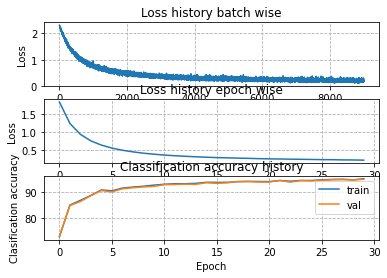

In [8]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [11]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256

for lr in learning_rates:
    for hidden_nodes in num_hidden_nodes:
        net = FirstNN(data_dimension, hidden_nodes, num_classes)
        
        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val,
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size,
                          learning_rate=lr,
                          verbose=False
                         )
        
        val_acc = stats['val_acc_history'][-1]
        results[(lr, hidden_nodes)] = val_acc
        
        if val_acc > best_val:
            best_val = val_acc
            best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}'.format(best_val, best_net.params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################


Best validation accuracy achieved during cross-validation: 96.47 for #hdnn: 100, lr: 0.01


# Test on best model

In [ ]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.39
Validation accuracy: 96.78
Test accuracy: 94.57
